# HR Attrition Project

In [1]:
#importing all the required libraries for EDA and vizualiztion.
import pandas as pd    # library for EDA.
import numpy as np     # library for numerical calculations.
import seaborn as sns  # library for vizualization.
import matplotlib.pyplot as plt  # library for vizualization.
import math
import warnings
warnings.filterwarnings('ignore')  # to ignore warnings

In [2]:
#lets load dataset 
df=pd.read_excel(r'C:\Users\Ismail\Desktop\HR_attrition.xlsx')

In [3]:
#lets check the type of dataset
type(df)
#since our dataset is already dataframe, no need to again make dataframe

pandas.core.frame.DataFrame

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Exploratory Data Analysis(EDA)

In [5]:
#print columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
#print first five rows 
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
#checking rows and columns
df.shape

(1470, 35)

In [8]:
#checking datatype of each column
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
#  check null values and summing up columns wise
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

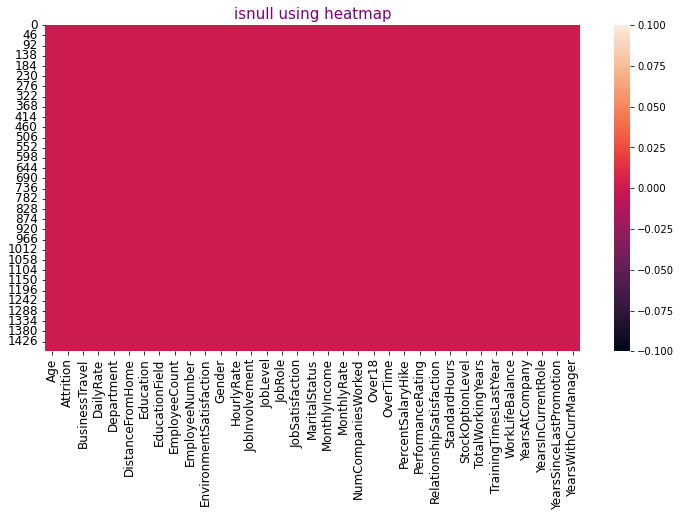

In [10]:
#isnull using heat map
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.title('isnull using heatmap', fontsize=15, color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### observations:

* from the above outcomes we can see that
   1. Dataset has 1470 rows and 35 columns.
   2. There are no null values in the dataframe
   3. In the heat map there are no lines which shows null, heat map is clean and have no shades..
   4. Data types of all the columns is int64 except Attrition, BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus, Over18 and OverTime 
columns are object type.

Minimum age: 18
Maximum age: 60


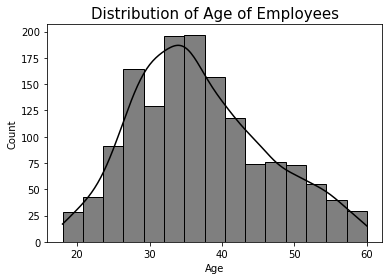

In [11]:
print('Minimum age:',df['Age'].min())
print('Maximum age:',df['Age'].max())

#distribution of age of employees
sns.histplot(df['Age'], kde=True,color='black',bins=15)
plt.title('Distribution of Age of Employees',fontsize=15)
plt.show()

In [12]:
df['Age'].value_counts()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

### Observations

* As you can see above the age of employees is distributed in the range of 18 to 60.
* The minimum aged employees are 18 years old.
* The maximum aged employees are 60 years old.

Text(0, 0.5, 'Count')

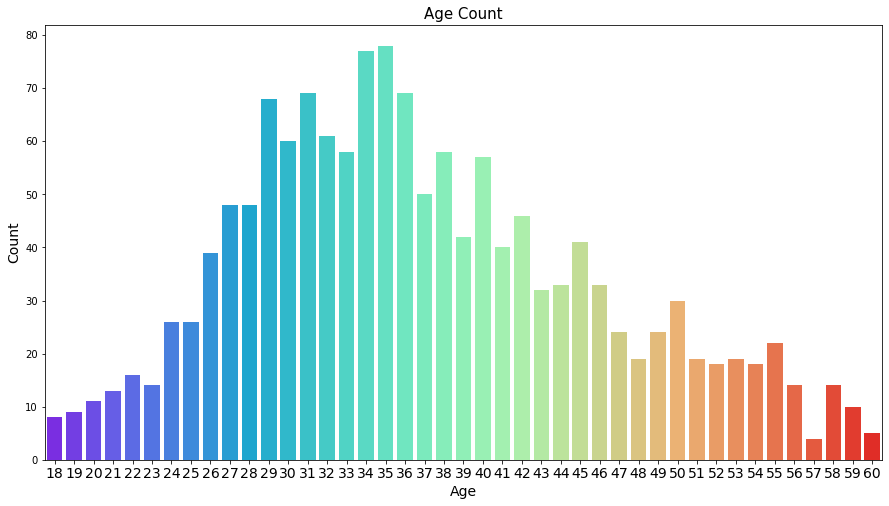

In [13]:
#lets plot count plot 
plt.figure(figsize=(15,8))
sns.countplot(df['Age'],palette='rainbow')
plt.title('Age Count',fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Count',fontsize=14)

### Observation

* We have 78 employees of age 35 which is maximum
* The least number(4) of employees are of age 57.

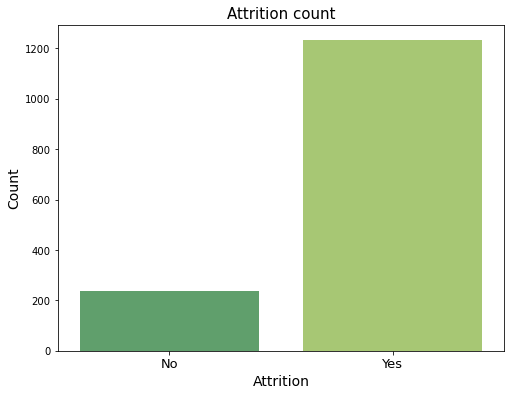

In [14]:
#lets plot count plot 
plt.figure(figsize=(8,6))
sns.countplot(df['Attrition'],palette='summer')
plt.title('Attrition count',fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel('Attrition',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(labels=['No','Yes'],ticks=[0,1],fontsize=13)
plt.show()

In [15]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

### Observations

* 1233 Employees didn't Attrited from companies, only 237 get Attrited from companies
* The count of Employees who didn't attrited is more compared to Employees who Attrited from companies.

In [16]:
from sklearn.preprocessing import LabelEncoder
#creating instance
le=LabelEncoder()
#training data
le.fit(df['Attrition'])
#transforming data
df['Attrition']=le.transform(df['Attrition'])


#now we have converted attrition column into numeric type using LabelEncoder

Text(0, 0.5, 'Attrition Count')

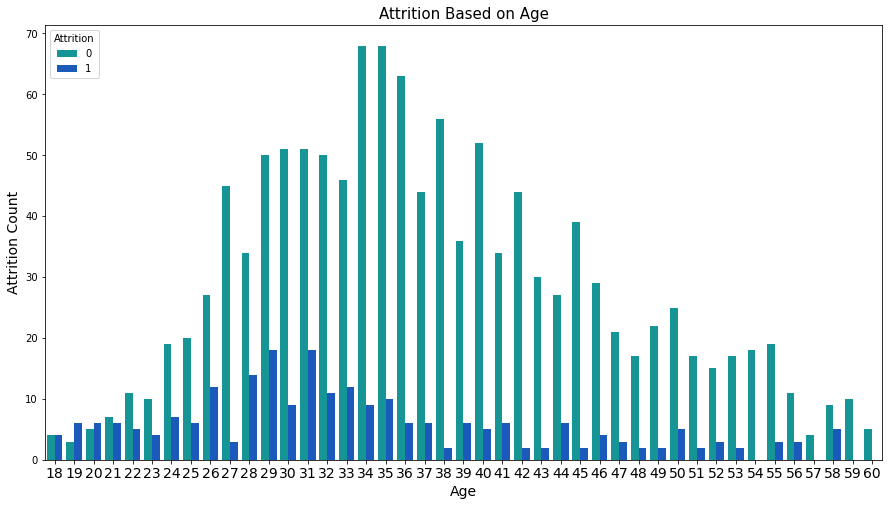

In [17]:
#lets plot count plot 
plt.figure(figsize=(15,8))
sns.countplot(df['Age'],hue=df['Attrition'],palette='winter_r')
plt.title('Attrition Based on Age',fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Attrition Count',fontsize=14)

### Observations

* Maximum attrition can be seen in the age category of 28 to 35.
* But Employees of age 18,19,20,21 shows high attrition compared to number of employees present.
* And we can see zero attrition at 57,57,59,60.

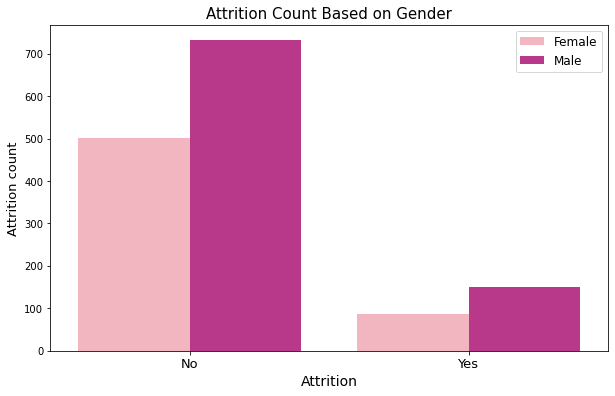

In [18]:
#Attrition Count Based on Gender
plt.figure(figsize=(10,6))
sns.countplot(df['Attrition'],hue=df['Gender'],palette='RdPu')
plt.legend(fontsize=12)
plt.title('Attrition Count Based on Gender',fontsize=15)
plt.xlabel('Attrition',fontsize=14)
plt.ylabel('Attrition count',fontsize=13)
plt.xticks(labels=['No','Yes'],ticks=[0,1],fontsize=13)
plt.show()

### Observations

* We have more Male Employees who didn't left the companies compared to Females who didn't left.
* In Employees who left the companies we have more Male Employees compared to Female Employees who left the companies.

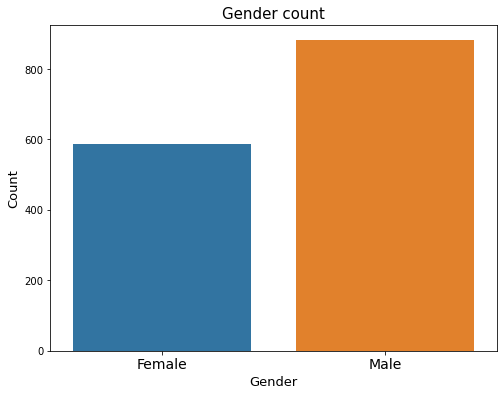

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(df['Gender'])
plt.title('Gender count',fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel('Gender',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.show()

In [20]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

### Observations

* The Male Employees count is more comapred to Female Employees
* Male Employees are 882 and Female Employees are 588 in the dataset.

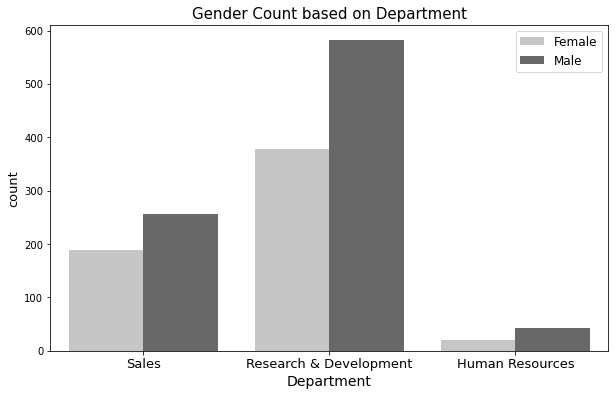

In [21]:
#gender Count Based on department
plt.figure(figsize=(10,6))
sns.countplot(df['Department'],hue=df['Gender'],palette='Greys')
plt.legend(fontsize=12)
plt.title('Gender Count based on Department',fontsize=15)
plt.xlabel('Department',fontsize=14)
plt.ylabel('count',fontsize=13)
plt.xticks(fontsize=13)
plt.show()

In [22]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

### Observations

* The dataset has three departments Research & Development, Sales, Human Resources.
* Employees in Research & Development are 961 which is more compared to Sales(446)and Human Resources(63).
* In every Department Majority is of Male employees.

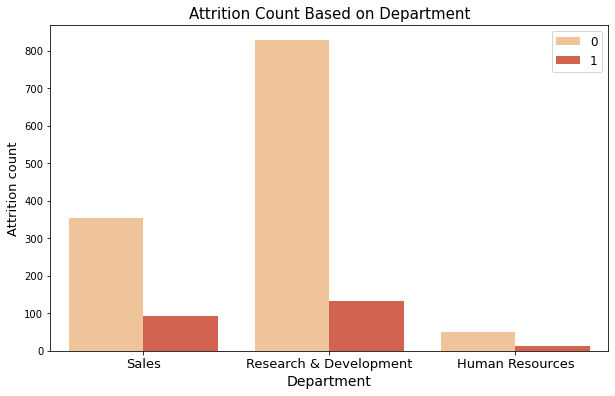

In [23]:
#Attrition Count Based on department
plt.figure(figsize=(10,6))
sns.countplot(df['Department'],hue=df['Attrition'],palette='OrRd')
plt.legend(fontsize=12)
plt.title('Attrition Count Based on Department',fontsize=15)
plt.xlabel('Department',fontsize=14)
plt.ylabel('Attrition count',fontsize=13)
plt.xticks(fontsize=13)
plt.show()

### Observations

* The attriion count is more in Research & Development department around (150) and sales compared to others .

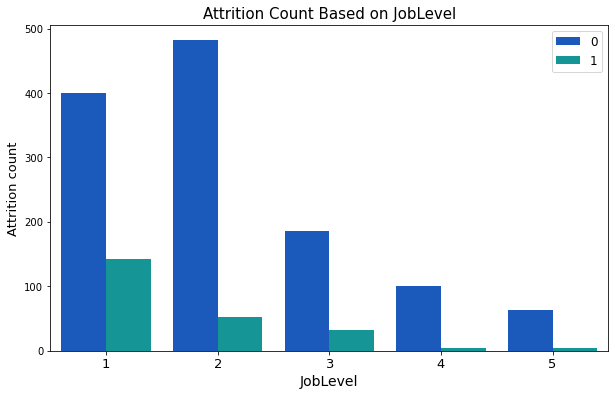

In [24]:
#Attrition Count Based on JobLevel
plt.figure(figsize=(10,6))
sns.countplot(df['JobLevel'],hue=df['Attrition'],palette='winter')
plt.legend(fontsize=12)
plt.title('Attrition Count Based on JobLevel',fontsize=15)
plt.xlabel('JobLevel',fontsize=14)
plt.ylabel('Attrition count',fontsize=13)
plt.xticks(fontsize=13)
plt.show()

### Observations

* Attrition at higher job levels is low.
* job level 1 have more attrition.

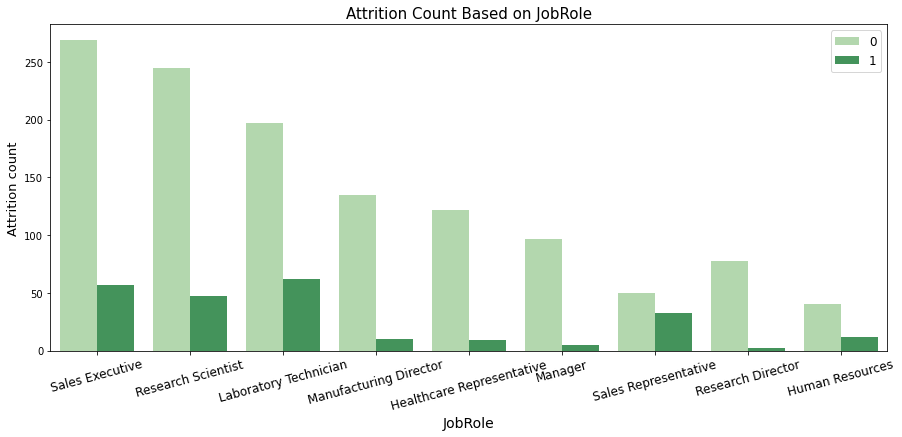

In [25]:
#Attrition Count Based on Jobrole
plt.figure(figsize=(15,6))
sns.countplot(df['JobRole'],hue=df['Attrition'],palette='Greens')
plt.legend(fontsize=12)
plt.title('Attrition Count Based on JobRole',fontsize=15)
plt.xlabel('JobRole',fontsize=14)
plt.ylabel('Attrition count',fontsize=13)
plt.xticks(rotation=15,fontsize=12)
plt.show()

### Observations

* Sales Representative job role causing more attrition.
* less attrition in Research Director and Manager

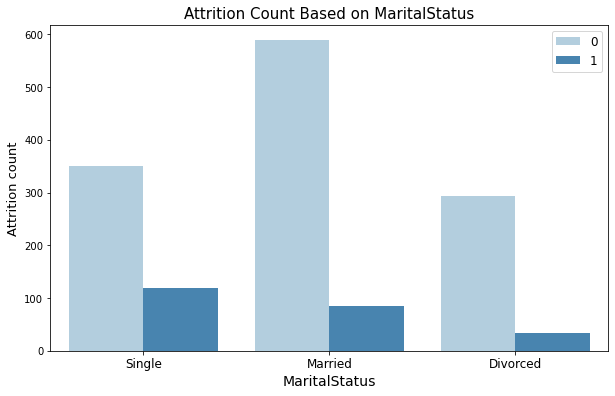

In [26]:
#Attrition Count Based on MaritalStatus
plt.figure(figsize=(10,6))
sns.countplot(df['MaritalStatus'],hue=df['Attrition'],palette='Blues')
plt.legend(fontsize=12)
plt.title('Attrition Count Based on MaritalStatus',fontsize=15)
plt.xlabel('MaritalStatus',fontsize=14)
plt.ylabel('Attrition count',fontsize=13)
plt.xticks(fontsize=12)
plt.show()

### Observations

* Employees who are single shows more attrition followed by married and divorced

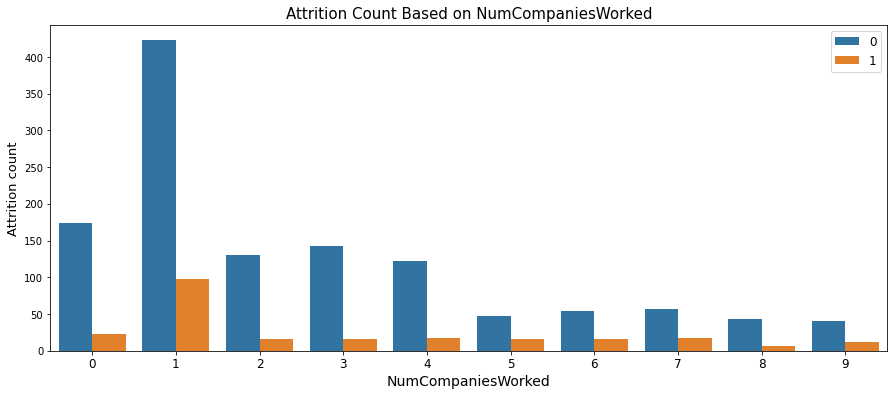

In [27]:
#Attrition Count Based on NumCompaniesWorked
plt.figure(figsize=(15,6))
sns.countplot(df['NumCompaniesWorked'],hue=df['Attrition'])
plt.legend(fontsize=12)
plt.title('Attrition Count Based on NumCompaniesWorked',fontsize=15)
plt.xlabel('NumCompaniesWorked',fontsize=14)
plt.ylabel('Attrition count',fontsize=13)
plt.xticks(fontsize=12)
plt.show()

### Observations

* we have more number of employees who worked in only one company.
* Employees who worked in 5 to 7 companies shows more attrition compared to others

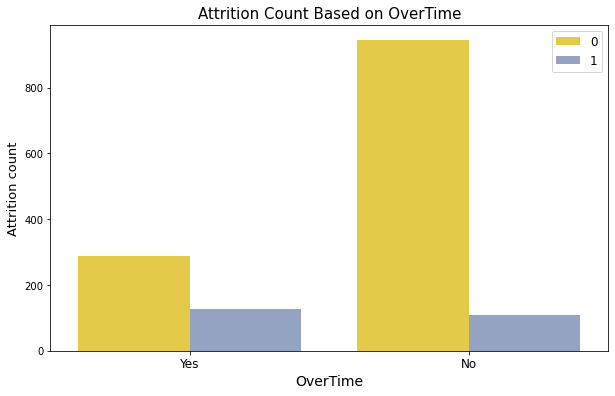

In [28]:
#Attrition Count Based on OverTime
plt.figure(figsize=(10,6))
sns.countplot(df['OverTime'],hue=df['Attrition'],palette='Set2_r')
plt.legend(fontsize=12)
plt.title('Attrition Count Based on OverTime',fontsize=15)
plt.xlabel('OverTime',fontsize=14)
plt.ylabel('Attrition count',fontsize=13)
plt.xticks(fontsize=12)
plt.show()

### Observations

* we have more Employees who do not work Overtime.
* Employees who working overtime shows high attrition compared to employees who do not work overtime.

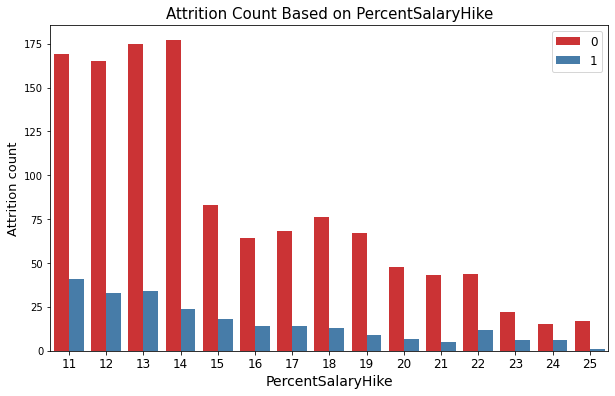

In [29]:
#Attrition Count Based on PercentSalaryHike
plt.figure(figsize=(10,6))
sns.countplot(df['PercentSalaryHike'],hue=df['Attrition'],palette='Set1')
plt.legend(fontsize=12)
plt.title('Attrition Count Based on PercentSalaryHike',fontsize=15)
plt.xlabel('PercentSalaryHike',fontsize=14)
plt.ylabel('Attrition count',fontsize=13)
plt.xticks(fontsize=12)
plt.show()

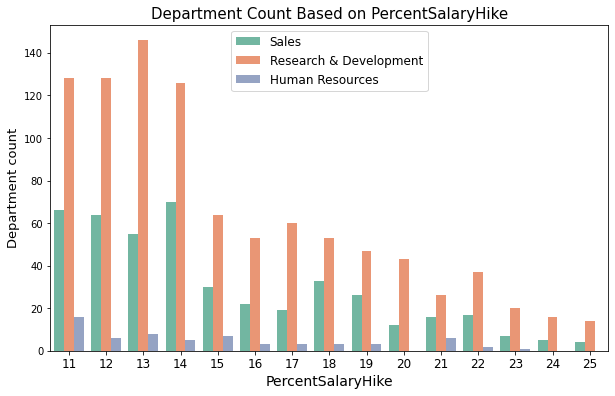

In [30]:
#Department Count Based on PercentSalaryHike
plt.figure(figsize=(10,6))
sns.countplot(df['PercentSalaryHike'],hue=df['Department'],palette='Set2')
plt.legend(fontsize=12)
plt.title('Department Count Based on PercentSalaryHike',fontsize=15)
plt.xlabel('PercentSalaryHike',fontsize=14)
plt.ylabel('Department count',fontsize=13)
plt.xticks(fontsize=12)
plt.show()

### Observations

* The most salary hike is for Research & Development 25 hike.

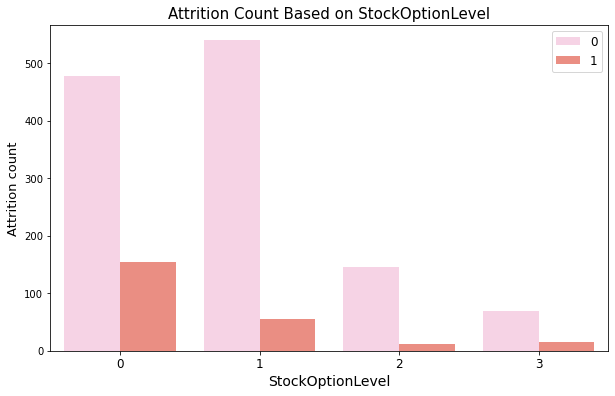

In [31]:
#Attrition Count Based on StockOptionLevel
plt.figure(figsize=(10,6))
sns.countplot(df['StockOptionLevel'],hue=df['Attrition'],palette='Set3_r')
plt.legend(fontsize=12)
plt.title('Attrition Count Based on StockOptionLevel',fontsize=15)
plt.xlabel('StockOptionLevel',fontsize=14)
plt.ylabel('Attrition count',fontsize=13)
plt.xticks(fontsize=12)
plt.show()

### Observations

* Employees withs 0 stockoption level shows more attrition.

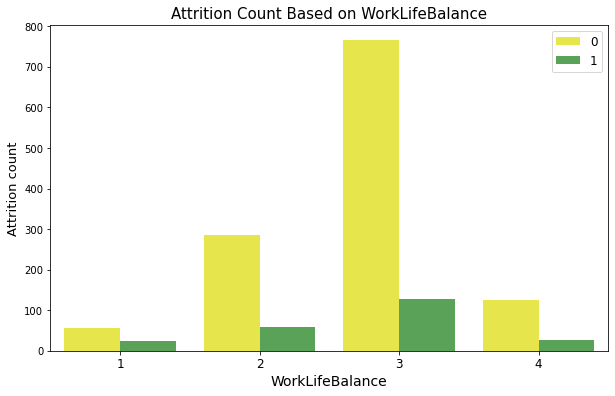

In [32]:
#Attrition Count Based on WorkLifeBalance
plt.figure(figsize=(10,6))
sns.countplot(df['WorkLifeBalance'],hue=df['Attrition'],palette='Set1_r')
plt.legend(fontsize=12)
plt.title('Attrition Count Based on WorkLifeBalance',fontsize=15)
plt.xlabel('WorkLifeBalance',fontsize=14)
plt.ylabel('Attrition count',fontsize=13)
plt.xticks(fontsize=12)
plt.show()

### Observations

* Employees with worklife balance above 2 shows less attrition
* Employees unbalanced in work and life shows more attrition.

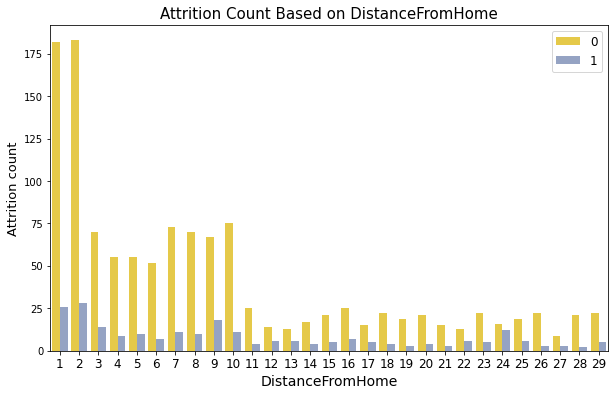

In [33]:
#Attrition Count Based on DistanceFromHome
plt.figure(figsize=(10,6))
sns.countplot(df['DistanceFromHome'],hue=df['Attrition'],palette='Set2_r')
plt.legend(fontsize=12)
plt.title('Attrition Count Based on DistanceFromHome',fontsize=15)
plt.xlabel('DistanceFromHome',fontsize=14)
plt.ylabel('Attrition count',fontsize=13)
plt.xticks(fontsize=12)
plt.show()

### Observations

* 24 and 9 shows high attrition compared to others.

In [34]:
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


In [35]:
df.drop(['EmployeeCount','EmployeeNumber','StandardHours'],axis=1,inplace=True)

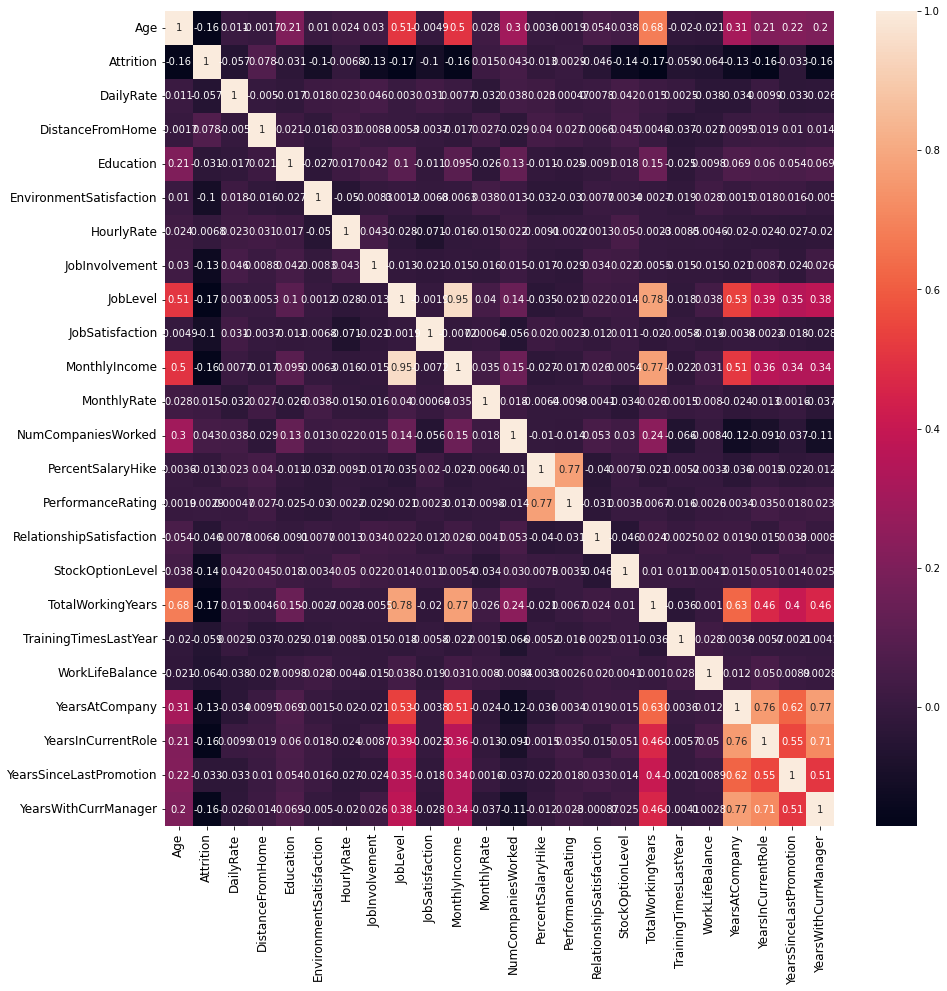

In [36]:
#df.corr() using heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Findings(insights)

* SalesRepresentative employees  are showing high attrition a company should give a 25 percentsalary hike to them if possible
* company should hire employees who can manage work life balance well
* hiring freshers should be avoided.
* companies should no hire employees with age group between 18 to 21 as tthey show high attrition
* company should not hire Employees who had worked in 5 to 7 companies before.
* comapny should increase stockoption level to 2 and above.
* company should promote hiring of married and divorced employees because employees who are single shows high attrition.
* company should keep above 5k salary as minimum to all job roles
* Employees who are working overtime shows more attrition among others , so a company should avoid employees working overtime
* company should promote standard hour working system to reduce attrition.
* Avoid having employees distance from home to office is 9 and 24 as they show high attrition.